<a href="https://colab.research.google.com/github/kishore2003-04/Java-Progs/blob/main/Facemask%20Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install kaggle

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:02<00:00, 63.7MB/s]
100% 163M/163M [00:02<00:00, 76.0MB/s]


In [17]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [18]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [20]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2599.jpg', 'with_mask_1311.jpg', 'with_mask_1765.jpg', 'with_mask_2554.jpg', 'with_mask_3160.jpg']
['with_mask_1713.jpg', 'with_mask_2899.jpg', 'with_mask_2248.jpg', 'with_mask_1128.jpg', 'with_mask_268.jpg']


In [21]:
without_mask_files=os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2599.jpg', 'with_mask_1311.jpg', 'with_mask_1765.jpg', 'with_mask_2554.jpg', 'with_mask_3160.jpg']
['with_mask_1713.jpg', 'with_mask_2899.jpg', 'with_mask_2248.jpg', 'with_mask_1128.jpg', 'with_mask_268.jpg']


In [22]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [23]:
with_mask_labels = [1]*3725
without_mask_labels =[ 0]*3828

In [24]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [25]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [26]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


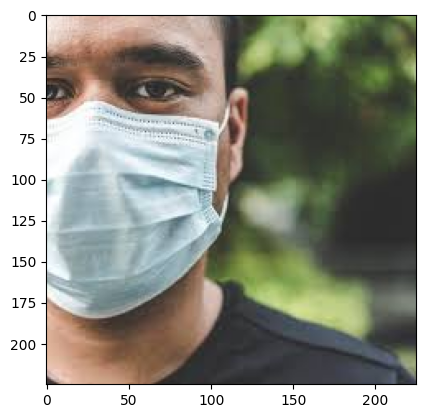

In [27]:
img = mpimg.imread('/content/data/with_mask/with_mask_2435.jpg')
imgplot=plt.imshow(img)
plt.show()

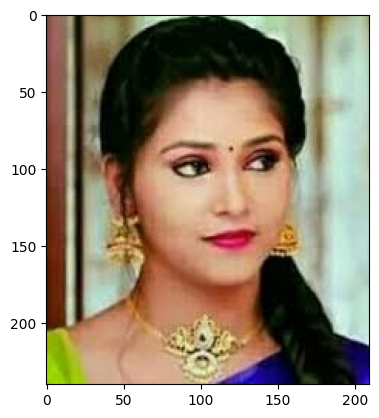

In [28]:
img = mpimg.imread('/content/data/without_mask/without_mask_1555.jpg')
imgplot=plt.imshow(img)
plt.show()

In [29]:
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)

In [30]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert ('RGB')
    image = np.array(image)
    data. append (image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert ('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [31]:

type(data)

list

In [32]:
len(data)

7553

array([[[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       ...,

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]],

       [[246, 246, 248],
        [246, 246, 248],
        [246, 246, 248],
        ...,
        [246, 246, 248],
        [246, 246, 248],
        [246, 246, 248]]], dtype=uint8)
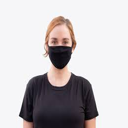

In [33]:
data[0]

In [34]:
type(data[0])

numpy.ndarray

In [35]:
X=np.array(data)
Y=np.array(labels)

In [36]:
type(X)

numpy.ndarray

In [37]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [38]:
print(Y)

[1 1 1 ... 0 0 0]


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [41]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([[[ 59,  61,  74],
        [ 60,  62,  75],
        [ 62,  64,  77],
        ...,
        [ 51,  41,  39],
        [103,  91,  90],
        [145, 130, 129]],

       [[ 64,  66,  80],
        [ 57,  59,  72],
        [ 50,  52,  64],
        ...,
        [ 43,  33,  31],
        [ 98,  87,  85],
        [141, 130, 128]],

       [[ 73,  73,  85],
        [ 61,  61,  73],
        [ 47,  47,  59],
        ...,
        [ 36,  26,  25],
        [ 76,  65,  63],
        [110,  98,  98]],

       ...,

       [[ 50,  52,  64],
        [ 44,  46,  58],
        [ 38,  40,  52],
        ...,
        [ 30,  31,  26],
        [ 33,  34,  29],
        [ 37,  38,  33]],

       [[ 53,  55,  67],
        [ 46,  48,  60],
        [ 38,  40,  52],
        ...,
        [ 32,  33,  28],
        [ 39,  40,  35],
        [ 45,  46,  41]],

       [[ 47,  50,  59],
        [ 47,  50,  59],
        [ 46,  49,  58],
        ...,
        [ 37,  37,  35],
        [ 39,  38,  36],
        [ 40,  39,  37]]], dtype=uint8)
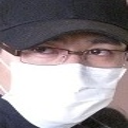

In [42]:
X_train[0]

In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
history= model.fit (X_train_scaled , Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 183s 1s/step - loss: 0.1575 - acc: 0.9426 - val_loss: 0.2523 - val_acc: 0.9140
Epoch 2/5
170/170 [==============================] - 137s 804ms/step - loss: 0.1402 - acc: 0.9441 - val_loss: 0.2215 - val_acc: 0.9223
Epoch 3/5
170/170 [==============================] - 131s 772ms/step - loss: 0.1088 - acc: 0.9562 - val_loss: 0.2286 - val_acc: 0.9256
Epoch 4/5
170/170 [==============================] - 132s 778ms/step - loss: 0.0991 - acc: 0.9614 - val_loss: 0.2508 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 140s 821ms/step - loss: 0.0882 - acc: 0.9667 - val_loss: 0.2587 - val_acc: 0.9223


In [48]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy=',accuracy)

48/48 [==============================] - 10s 208ms/step - loss: 0.1832 - acc: 0.9444
Test Accuracy= 0.9444077014923096


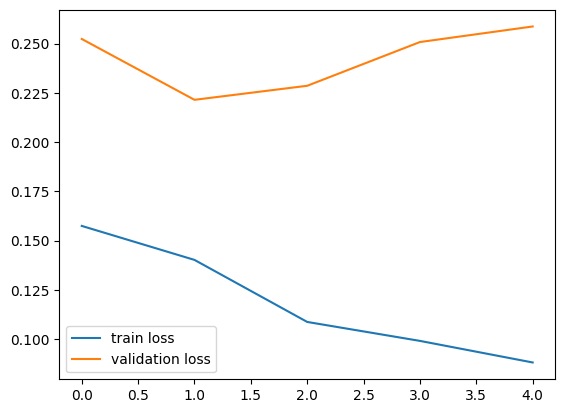

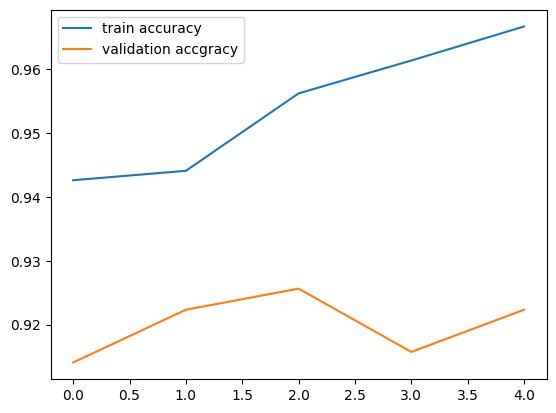

In [53]:
h = history
 # plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label= 'validation loss')
plt.legend()
plt.show()
 # plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accgracy')
plt. legend()
plt. show()